<font color = 'white'>
The challenge of this competition is to predict if the car purchased at the Auction is a good / bad buy.</br>
The data contains missing values </br>
The dependent variable (IsBadBuy) is binary.</br>
There are 32 Independent variables. </br>
</font>

## Loading Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold


pd.options.display.max_columns = 5000
pd.options.display.max_rows = 5000
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')

## Loading & Analyzing Data

In [3]:
df = pd.read_csv('/home/shilpi_fire/Documents/Kaggle/8. DontGetKicked/training.csv') 
df_test = pd.read_csv('/home/shilpi_fire/Documents/Kaggle/8. DontGetKicked/test.csv')
print(df.shape, df_test.shape)
df.columns = df.columns.str.lower()
df_test.columns = df_test.columns.str.lower()
df.head(3) 

(72983, 34) (48707, 33)


,refid,isbadbuy,purchdate,auction,vehyear,vehicleage,make,model,trim,submodel,color,transmission,wheeltypeid,wheeltype,vehodo,nationality,size,topthreeamericanname,mmracquisitionauctionaverageprice,mmracquisitionauctioncleanprice,mmracquisitionretailaverageprice,mmracquisitonretailcleanprice,mmrcurrentauctionaverageprice,mmrcurrentauctioncleanprice,mmrcurrentretailaverageprice,mmrcurrentretailcleanprice,primeunit,aucguart,byrno,vnzip1,vnst,vehbcost,isonlinesale,warrantycost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389


In [4]:
for feature in df.columns: 
    null = df[feature].isnull().sum()
    if(null >0):
        print("Feature {} has {}% null values".format(feature, "{:.4f}%".format(null/df.shape[0])))

Feature trim has 0.0323%% null values
Feature submodel has 0.0001%% null values
Feature color has 0.0001%% null values
Feature transmission has 0.0001%% null values
Feature wheeltypeid has 0.0434%% null values
Feature wheeltype has 0.0435%% null values
Feature nationality has 0.0001%% null values
Feature size has 0.0001%% null values
Feature topthreeamericanname has 0.0001%% null values
Feature mmracquisitionauctionaverageprice has 0.0002%% null values
Feature mmracquisitionauctioncleanprice has 0.0002%% null values
Feature mmracquisitionretailaverageprice has 0.0002%% null values
Feature mmracquisitonretailcleanprice has 0.0002%% null values
Feature mmrcurrentauctionaverageprice has 0.0043%% null values
Feature mmrcurrentauctioncleanprice has 0.0043%% null values
Feature mmrcurrentretailaverageprice has 0.0043%% null values
Feature mmrcurrentretailcleanprice has 0.0043%% null values
Feature primeunit has 0.9532%% null values
Feature aucguart has 0.9532%% null values


In [5]:
#clearly primeunit and aucguart has a high% of null values, hence they're useless.
df.drop(['primeunit', 'aucguart'], axis = 1, inplace = True)
df_test.drop(['primeunit', 'aucguart'], axis = 1, inplace = True) 

In [6]:
#Let's analyze the cardinality of features, Features with very high cardinality don't give much information
for feature in df.columns:
    if(df[feature].dtypes == 'object'): 
        print('Feature {} has {} unique values'.format(feature, df[feature].nunique()))

Feature purchdate has 517 unique values
Feature auction has 3 unique values
Feature make has 33 unique values
Feature model has 1063 unique values
Feature trim has 134 unique values
Feature submodel has 863 unique values
Feature color has 16 unique values
Feature transmission has 3 unique values
Feature wheeltype has 3 unique values
Feature nationality has 4 unique values
Feature size has 12 unique values
Feature topthreeamericanname has 4 unique values
Feature vnst has 37 unique values


<b>These features seem they have decent number of unique values, Nothing needs to be done,</b>

## Dealing with missing values: 

In [7]:
for feature in df.columns: 
    null = df[feature].isnull().sum()
    if(null >0):
        print("Feature {} has {}% null values".format(feature, "{:.4f}%".format(null/df.shape[0])))

Feature trim has 0.0323%% null values
Feature submodel has 0.0001%% null values
Feature color has 0.0001%% null values
Feature transmission has 0.0001%% null values
Feature wheeltypeid has 0.0434%% null values
Feature wheeltype has 0.0435%% null values
Feature nationality has 0.0001%% null values
Feature size has 0.0001%% null values
Feature topthreeamericanname has 0.0001%% null values
Feature mmracquisitionauctionaverageprice has 0.0002%% null values
Feature mmracquisitionauctioncleanprice has 0.0002%% null values
Feature mmracquisitionretailaverageprice has 0.0002%% null values
Feature mmracquisitonretailcleanprice has 0.0002%% null values
Feature mmrcurrentauctionaverageprice has 0.0043%% null values
Feature mmrcurrentauctioncleanprice has 0.0043%% null values
Feature mmrcurrentretailaverageprice has 0.0043%% null values
Feature mmrcurrentretailcleanprice has 0.0043%% null values



<b>All these features have normal level of missing values

In [8]:
obj_cols = df.select_dtypes(include='object').columns
num_cols = [feature for feature in df.columns if feature not in obj_cols]
num_cols.remove('refid') #since we don't want to do feature engineering on this feature.
print('Numerical Features {} + Categorical Features {} = {}, Total Features: {}'.format(len(num_cols), len(obj_cols), len(num_cols)+ len(obj_cols), df.shape[1]))

Numerical Features 18 + Categorical Features 13 = 31, Total Features: 32


In [9]:
#fill the numerical features with median of them, in both training and test data
num_cols.remove('isbadbuy')
for feature in num_cols: #both test and train data have missing values in same features. 
    median_val = df[feature].median()
    df[feature].fillna(median_val, inplace=True)
    median_test_val = df_test[feature].median() 
    df_test[feature].fillna(median_test_val, inplace = True)

In [10]:
#filling missing vlaues in categorical features with mode(most ocurring)
for col in obj_cols:
    mode_val = df[col].mode()[0]
    mode_test_val = df_test[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    df_test[col].fillna(mode_test_val, inplace = True)

In [11]:
#this shouldn't print anything since all missing values are taken care of . 
for col in df.columns: 
    null = df[col].isnull().sum() 
    if(null > 0): 
        print("Feature {} has {} null values".format(feature, null)) 

## Feature Engineering,(Both Train & Test data)

In [12]:
df['purchdate'].head(3) #MM/DD/YYYY

0    12/7/2009
1    12/7/2009
2    12/7/2009
Name: purchdate, dtype: object

In [13]:
#divide purchdate into date, month and year 
df['month'] =  df['purchdate'].str.split('/', expand = True)[0]
df['date'] = df['purchdate'].str.split('/', expand = True)[1]
df['year'] = df['purchdate'].str.split('/', expand = True)[2]
df_test['month']  = df['purchdate'].str.split('/', expand = True)[0]
df_test['date'] = df['purchdate'].str.split('/', expand = True)[1]
df_test['year'] = df['purchdate'].str.split('/', expand = True)[2]
df.drop('purchdate', axis = 1, inplace = True) 
df_test.drop('purchdate', axis = 1 , inplace = True)
obj_cols = obj_cols.drop('purchdate')
# print(df.shape, df_test.shape) #(72983, 34) (48707, 33)
df.head(3)

,refid,isbadbuy,auction,vehyear,vehicleage,make,model,trim,submodel,color,transmission,wheeltypeid,wheeltype,vehodo,nationality,size,topthreeamericanname,mmracquisitionauctionaverageprice,mmracquisitionauctioncleanprice,mmracquisitionretailaverageprice,mmracquisitonretailcleanprice,mmrcurrentauctionaverageprice,mmrcurrentauctioncleanprice,mmrcurrentretailaverageprice,mmrcurrentretailcleanprice,byrno,vnzip1,vnst,vehbcost,isonlinesale,warrantycost,month,date,year
0,1,0,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,FL,7100.0,0,1113,12,7,2009
1,2,0,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,FL,7600.0,0,1053,12,7,2009
2,3,0,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,FL,4900.0,0,1389,12,7,2009


In [14]:
print(df['month'].dtypes)

object


In [15]:
#convert datatype of month , date, year values to integer. 
df['month'] = df['month'].astype(int)
df['date'] = df['date'].astype(int) 
df['year'] = df['year'].astype(int)

df_test['month'] = df_test['month'].astype(int)
df_test['date'] = df_test['date'].astype(int) 
df_test['year'] = df_test['year'].astype(int)

In [16]:
#we'll combine the MMRAcquisitionAveragePrice with some of the other features using 'groupby' 
df['mean_MMRAcquisitionAuctionAveragePrice_Make']=df.groupby(['make'])['mmracquisitionauctionaverageprice'].transform('mean')
df['mean_MMRAcquisitionAuctionAveragePrice_Model']=df.groupby(['model'])['mmracquisitionauctionaverageprice'].transform('mean')
df['mean_MMRAcquisitionAuctionAveragePrice_Trim']=df.groupby(['trim'])['mmracquisitionauctionaverageprice'].transform('mean')
df['mean_MMRAcquisitionAuctionAveragePrice_SubModel']=df.groupby(['submodel'])['mmracquisitionauctionaverageprice'].transform('mean')
df['mean_MMRAcquisitionAuctionAveragePrice_Color']=df.groupby(['color'])['mmracquisitionauctionaverageprice'].transform('mean')
df['mean_MMRAcquisitionAuctionAveragePrice_Transmission']=df.groupby(['transmission'])['mmracquisitionauctionaverageprice'].transform('mean')

In [17]:
#doing the same as above for test data 
df_test['mean_MMRAcquisitionAuctionAveragePrice_Make']=df_test.groupby(['make'])['mmracquisitionauctionaverageprice'].transform('mean')
df_test['mean_MMRAcquisitionAuctionAveragePrice_Model']=df_test.groupby(['model'])['mmracquisitionauctionaverageprice'].transform('mean')
df_test['mean_MMRAcquisitionAuctionAveragePrice_Trim']=df_test.groupby(['trim'])['mmracquisitionauctionaverageprice'].transform('mean')
df_test['mean_MMRAcquisitionAuctionAveragePrice_SubModel']=df_test.groupby(['submodel'])['mmracquisitionauctionaverageprice'].transform('mean')
df_test['mean_MMRAcquisitionAuctionAveragePrice_Color']=df_test.groupby(['color'])['mmracquisitionauctionaverageprice'].transform('mean')
df_test['mean_MMRAcquisitionAuctionAveragePrice_Transmission']=df_test.groupby(['transmission'])['mmracquisitionauctionaverageprice'].transform('mean')

In [18]:
#features that we created, these aren't in num_cols 
lis = ['date', 'month', 'year','mean_MMRAcquisitionAuctionAveragePrice_Make','mean_MMRAcquisitionAuctionAveragePrice_Model','mean_MMRAcquisitionAuctionAveragePrice_Trim','mean_MMRAcquisitionAuctionAveragePrice_SubModel','mean_MMRAcquisitionAuctionAveragePrice_Color','mean_MMRAcquisitionAuctionAveragePrice_Transmission']

In [22]:
#adding these numerical features into num_cols 
for feature in lis: 
    num_cols.append(feature)
print(df.shape, len(num_cols)) 
print('Categorical Features: {} + Numerical Features: {} = {}'.format(len(obj_cols) , len(num_cols), len(obj_cols) + len(num_cols)))

(72983, 40) 26
Categorical Features: 12 + Numerical Features: 26 = 38


In [23]:
#before performing standard scaler operation, 
df[num_cols].head(3)

,vehyear,vehicleage,wheeltypeid,vehodo,mmracquisitionauctionaverageprice,mmracquisitionauctioncleanprice,mmracquisitionretailaverageprice,mmracquisitonretailcleanprice,mmrcurrentauctionaverageprice,mmrcurrentauctioncleanprice,mmrcurrentretailaverageprice,mmrcurrentretailcleanprice,byrno,vnzip1,vehbcost,isonlinesale,warrantycost,date,month,year,mean_MMRAcquisitionAuctionAveragePrice_Make,mean_MMRAcquisitionAuctionAveragePrice_Model,mean_MMRAcquisitionAuctionAveragePrice_Trim,mean_MMRAcquisitionAuctionAveragePrice_SubModel,mean_MMRAcquisitionAuctionAveragePrice_Color,mean_MMRAcquisitionAuctionAveragePrice_Transmission
0,2006,3,1.0,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,7100.0,0,1113,7,12,2009,6421.329928,7322.450495,7290.796715,7026.754137,6040.932076,6175.54354
1,2004,5,1.0,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,7600.0,0,1053,7,12,2009,6505.303748,7650.160763,6763.838288,7304.413965,5997.308257,6175.54354
2,2005,4,2.0,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,4900.0,0,1389,7,12,2009,6505.303748,4847.384899,5615.087843,5560.513711,5868.898827,6175.54354


<b>As we can see, the values of numerical columns range through a wide variety of values, performing standardization can improve the accuracy. </b>

In [24]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df_test[num_cols] = scaler.fit_transform(df_test[num_cols])
df[num_cols].head(3)

,vehyear,vehicleage,wheeltypeid,vehodo,mmracquisitionauctionaverageprice,mmracquisitionauctioncleanprice,mmracquisitionretailaverageprice,mmracquisitonretailcleanprice,mmrcurrentauctionaverageprice,mmrcurrentauctioncleanprice,mmrcurrentretailaverageprice,mmrcurrentretailcleanprice,byrno,vnzip1,vehbcost,isonlinesale,warrantycost,date,month,year,mean_MMRAcquisitionAuctionAveragePrice_Make,mean_MMRAcquisitionAuctionAveragePrice_Model,mean_MMRAcquisitionAuctionAveragePrice_Trim,mean_MMRAcquisitionAuctionAveragePrice_SubModel,mean_MMRAcquisitionAuctionAveragePrice_Color,mean_MMRAcquisitionAuctionAveragePrice_Transmission
0,0.379467,-0.687212,-0.909824,1.203528,0.823058,0.902005,0.994646,1.107445,0.543047,0.433383,0.914874,0.685359,-0.170036,-0.933946,0.208767,-0.161045,-0.273162,-1.020348,1.578574,-1.04,0.435262,0.639666,1.112585,0.570647,-0.251615,0.191278
1,-0.775775,0.480877,-0.909824,1.515419,0.294555,0.370805,0.760480,0.803783,0.545105,0.683343,0.842566,0.801009,-0.260831,-0.933946,0.491599,-0.161045,-0.373355,-1.020348,1.578574,-1.04,0.560252,0.815298,0.607990,0.747119,-0.376390,0.191278
2,-0.198154,-0.103168,1.014360,0.158244,-1.188989,-0.960135,-0.492422,-0.411749,-0.863122,-0.683974,-0.528378,-0.436926,-0.260831,-0.933946,-1.035693,-0.161045,0.187727,-1.020348,1.578574,-1.04,0.560252,-0.686811,-0.492007,-0.361250,-0.743675,0.191278


<b>Now, all the values are in a range between -1 to 1 

## Encoding Values( Both Train & Test)

In [25]:
print(obj_cols) #These are the features which have object datatype, (len) = 12
#these features need to be encoded in numerical values. 

Index(['auction', 'make', 'model', 'trim', 'submodel', 'color', 'transmission',
       'wheeltype', 'nationality', 'size', 'topthreeamericanname', 'vnst'],
      dtype='object')


In [26]:
#basic encoding: 
def encode_features(df_train, df_test):
#     features = ['auction','make','model','trim','submodel','color','transmission','wheeltype','nationality','size','topthreeamericanname','vnst']
    features = obj_cols 
    df_combined = pd.concat([df_train[features], df_test[features]])
    # print(df_combined.shape)
    for feature in obj_cols:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature]) 
        df_train[feature] = le.transform(df_train[feature])
        # print(df_train)
        df_test[feature] = le.transform(df_test[feature])
    return df_train,df_test

df, df_test  = encode_features(df, df_test)
#after this there are no columns with object value

In [27]:
#check if there are any columns of obj datatype left, this shouldn't print anything
for feature in df.columns: 
    if df[feature].dtypes == 'object': 
        print('Feature {} has object datatype'.format(feature))

## Checking TargetFeature distribution

In [28]:
x = df.drop(['refid','isbadbuy'], axis = 1) 
y = df['isbadbuy']
print(x.shape, y.shape)

(72983, 38) (72983,)


In [29]:
print(y.value_counts())

0    64007
1     8976
Name: isbadbuy, dtype: int64


<b>As we can see, This is highly imbalanced dataset, We can apply SMOTE to deal with imbalancy, </br>For model evaluation, SMOTE should be applied only on training set and not on test set</b>

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [31]:
# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to your training data
x_balanced , y_balanced = smote.fit_resample(xtrain, ytrain)

In [32]:
print(x_balanced.shape, y_balanced.shape)
print(y_balanced.value_counts())

(102314, 38) (102314,)
0    51157
1    51157
Name: isbadbuy, dtype: int64


<b>As we can see,x_balanced now represents a balanced training database. </b>

## Defining performance Metric Function

In [33]:
def performance(ytest, ypred): 
#     tn, fp, fn, tp = confusion_matrix(ytest, ypred)[1][1],confusion_matrix(ytest, ypred)[1][0],confusion_matrix(ytest, ypred)[0][1],confusion_matrix(ytest, ypred)[0][0]
#     specificity = tn / (tn + fp)
    print("Precision_Score: {}".format(precision_score(ytest, ypred))) 
    print("Recall_Score: ", recall_score(ytest, ypred)) 
    print("F1_Score: ",f1_score(ytest, ypred)) 
    print("Accuracy_Score: ",accuracy_score(ytest, ypred))
#     print("Specificity_Score: ", specificity)
    print('\n Confusion Matirx: ', confusion_matrix(ytest, ypred)) 
    #copied lines of code: 1 -> it is a bad buy, shouldn't have bought it
    plt.figure(figsize=(4,2))
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest, ypred), display_labels=['IsBadBuy', 'IsGoodBuy'] )
    cm_display.plot()
    plt.show()

## Evaluating Models (without HyperTuning)

<b>In this dataset, false negative (meaning something is postive, but we're classifying it as positive)( isNotBadBuy) is costly, because if we declare somethign as not a bad buy, then people might buy it and lose their money. (since it actually is a badbuy). </br>Therfore, we'll give recall priority.</b>

In [36]:
relevant_columns = x_balanced.columns
# print(len(relevant_columns)) #38

Processing model:  Logistic Regression
For validation dataset
Precision_Score: 0.6399008201411406
Recall_Score:  0.661344372166371
F1_Score:  0.6504459092671578
Accuracy_Score:  0.6475590089429702

 Confusion Matirx:  [[6541 3776]
 [3436 6710]]


<Figure size 400x200 with 0 Axes>

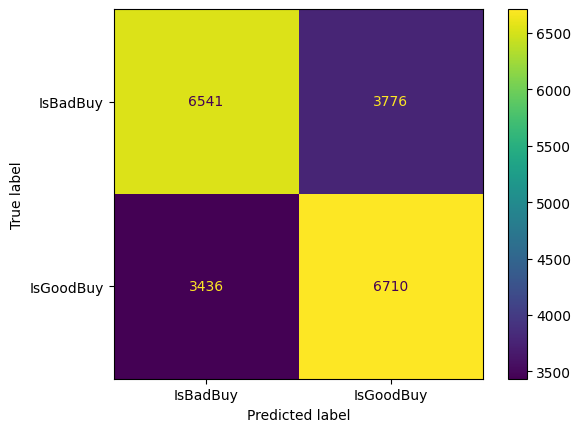

For validation dataset
Precision_Score: 0.6457077232271031
Recall_Score:  0.6556851311953352
F1_Score:  0.6506581802401272
Accuracy_Score:  0.6459463421785662

 Confusion Matirx:  [[6471 3702]
 [3543 6747]]


<Figure size 400x200 with 0 Axes>

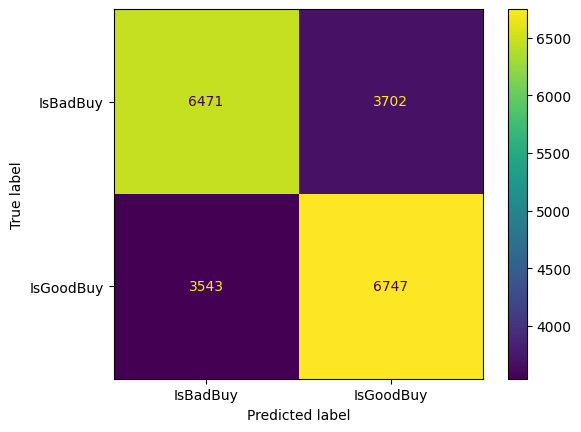

For validation dataset
Precision_Score: 0.6447306126313797
Recall_Score:  0.6648115602421402
F1_Score:  0.6546171225304042
Accuracy_Score:  0.6488784635683917

 Confusion Matirx:  [[6469 3752]
 [3433 6809]]


<Figure size 400x200 with 0 Axes>

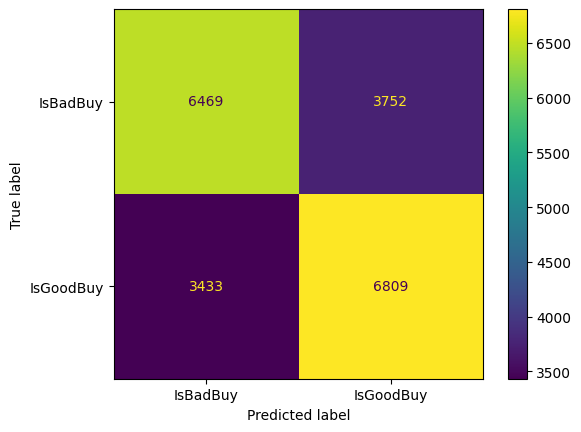

For validation dataset
Precision_Score: 0.6503569728700619
Recall_Score:  0.6644621668936005
F1_Score:  0.6573339106172127
Accuracy_Score:  0.6519083223378781

 Confusion Matirx:  [[6508 3673]
 [3450 6832]]


<Figure size 400x200 with 0 Axes>

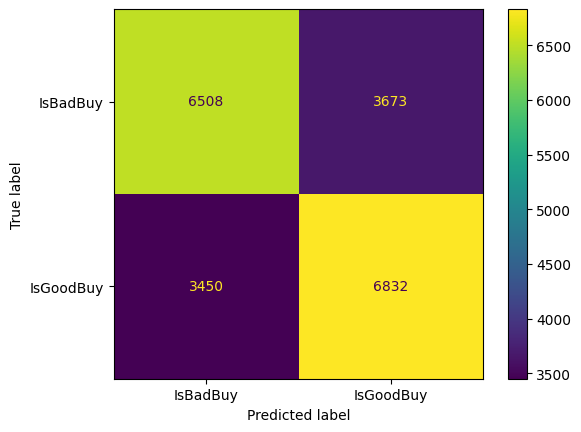

For validation dataset
Precision_Score: 0.6392651697903136
Recall_Score:  0.6756889281161126
F1_Score:  0.6569725864123956
Accuracy_Score:  0.6483725930994038

 Confusion Matirx:  [[6377 3888]
 [3307 6890]]


<Figure size 400x200 with 0 Axes>

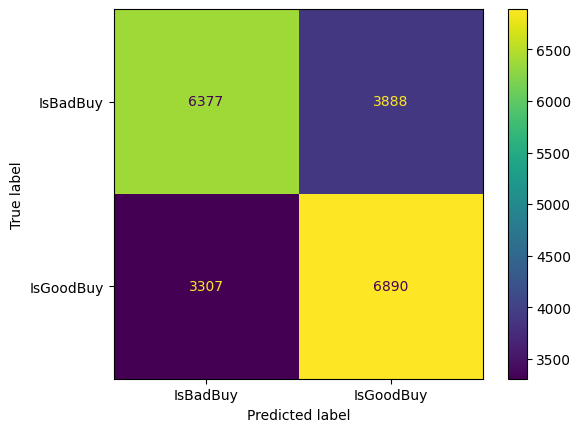

Model: Logistic Regression
For Test Dataset, 
Precision_Score: 0.18016949152542372
Recall_Score:  0.6084716657126502
F1_Score:  0.278017523211717
Accuracy_Score:  0.6217715969034733

 Confusion Matirx:  [[8013 4837]
 [ 684 1063]]


<Figure size 400x200 with 0 Axes>

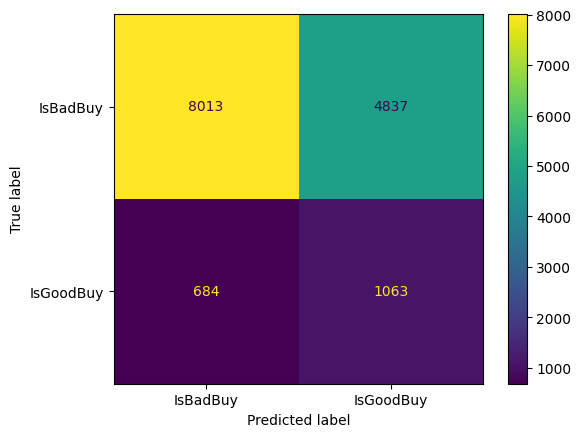

Processing model:  Decision Trees
For validation dataset
Precision_Score: 0.8480578827113481
Recall_Score:  0.8779814705302582
F1_Score:  0.8627602905569007
Accuracy_Score:  0.8615061330205738

 Confusion Matirx:  [[8721 1596]
 [1238 8908]]


<Figure size 400x200 with 0 Axes>

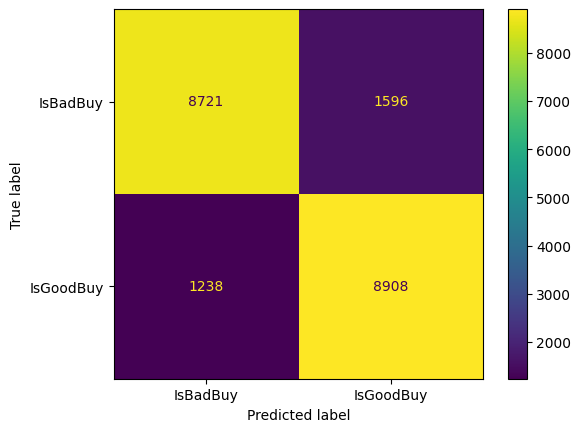

For validation dataset
Precision_Score: 0.8526802567006417
Recall_Score:  0.8780369290573372
F1_Score:  0.8651728430527625
Accuracy_Score:  0.8623857694375214

 Confusion Matirx:  [[8612 1561]
 [1255 9035]]


<Figure size 400x200 with 0 Axes>

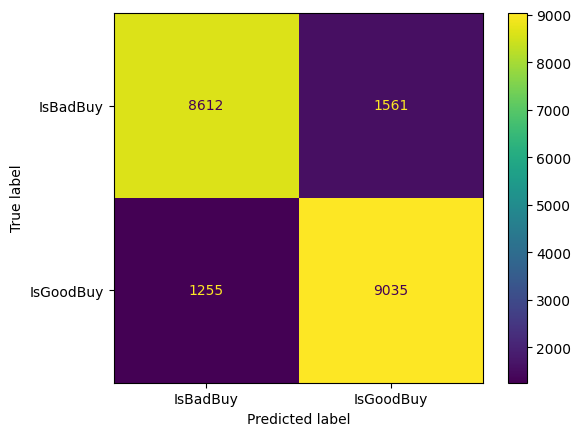

For validation dataset
Precision_Score: 0.8560924369747899
Recall_Score:  0.8753173208357743
F1_Score:  0.8655981461813266
Accuracy_Score:  0.863949567512095

 Confusion Matirx:  [[8714 1507]
 [1277 8965]]


<Figure size 400x200 with 0 Axes>

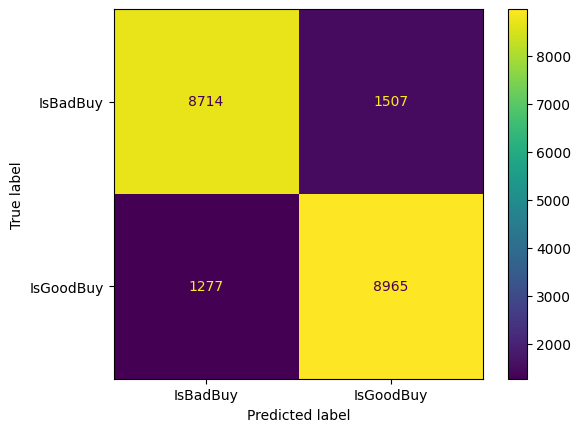

For validation dataset
Precision_Score: 0.8521739130434782
Recall_Score:  0.8864034234584711
F1_Score:  0.8689517090146351
Accuracy_Score:  0.8656599716561599

 Confusion Matirx:  [[8600 1581]
 [1168 9114]]


<Figure size 400x200 with 0 Axes>

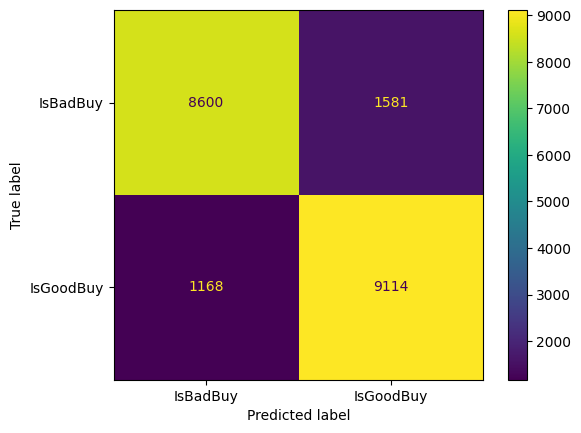

For validation dataset
Precision_Score: 0.8514992860542598
Recall_Score:  0.8772187898401491
F1_Score:  0.8641677132644189
Accuracy_Score:  0.8625745283940964

 Confusion Matirx:  [[8705 1560]
 [1252 8945]]


<Figure size 400x200 with 0 Axes>

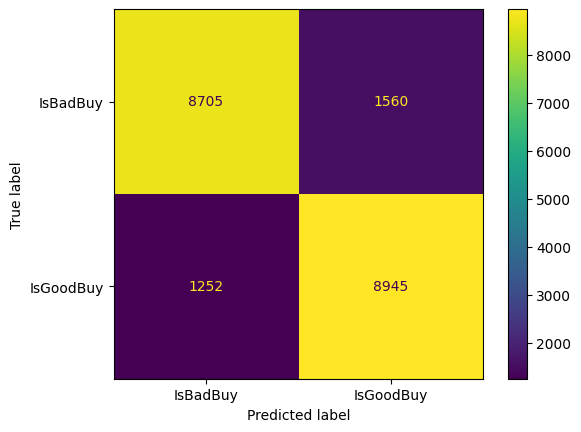

Model: Decision Trees
For Test Dataset, 
Precision_Score: 0.1723128398159766
Recall_Score:  0.2358328563251288
F1_Score:  0.19913001449975834
Accuracy_Score:  0.7729670480235665

 Confusion Matirx:  [[10871  1979]
 [ 1335   412]]


<Figure size 400x200 with 0 Axes>

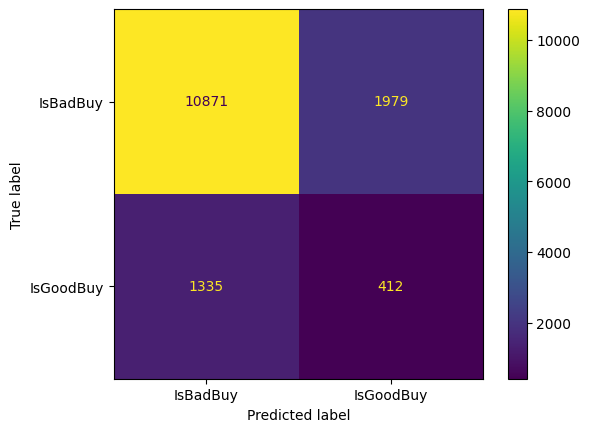

Processing model:  XGBoost
For validation dataset
Precision_Score: 0.9891525423728813
Recall_Score:  0.8628030751034891
F1_Score:  0.921667719519899
Accuracy_Score:  0.9272833895323266

 Confusion Matirx:  [[10221    96]
 [ 1392  8754]]


<Figure size 400x200 with 0 Axes>

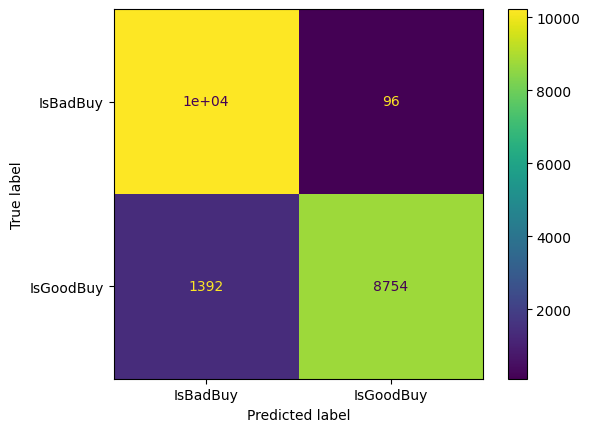

For validation dataset
Precision_Score: 0.9905534563236275
Recall_Score:  0.8661807580174927
F1_Score:  0.924201576109498
Accuracy_Score:  0.9285539754679177

 Confusion Matirx:  [[10088    85]
 [ 1377  8913]]


<Figure size 400x200 with 0 Axes>

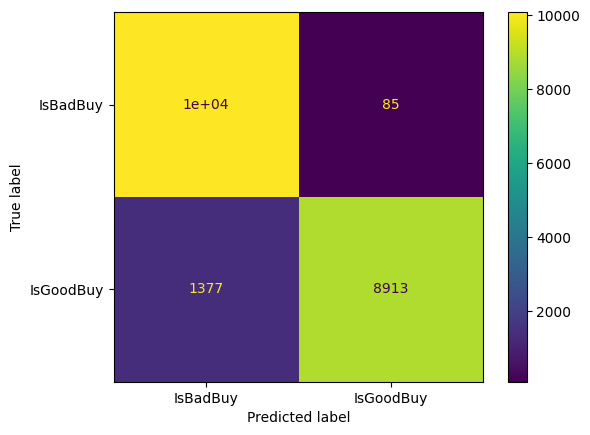

For validation dataset
Precision_Score: 0.9888318070136252
Recall_Score:  0.8644795938293303
F1_Score:  0.9224838508022505
Accuracy_Score:  0.9272833895323266

 Confusion Matirx:  [[10121   100]
 [ 1388  8854]]


<Figure size 400x200 with 0 Axes>

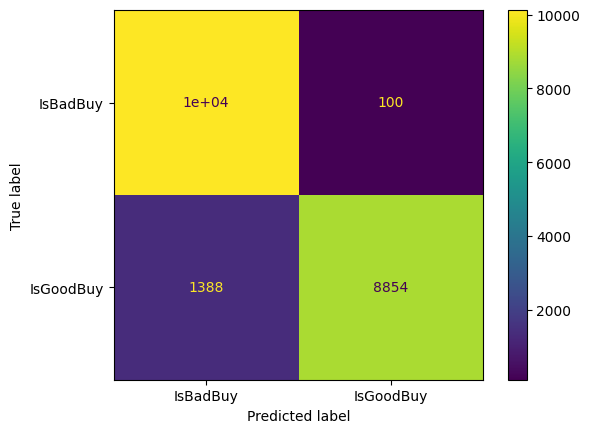

For validation dataset
Precision_Score: 0.987024411700022
Recall_Score:  0.8729819101342151
F1_Score:  0.9265070189925682
Accuracy_Score:  0.9304109856814738

 Confusion Matirx:  [[10063   118]
 [ 1306  8976]]


<Figure size 400x200 with 0 Axes>

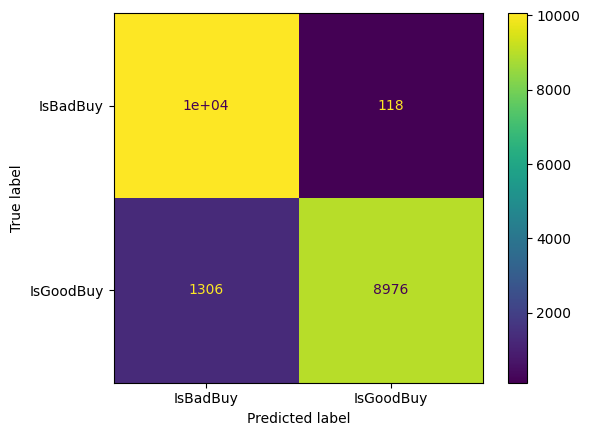

For validation dataset
Precision_Score: 0.9885701479157328
Recall_Score:  0.8651564185544768
F1_Score:  0.9227550860310653
Accuracy_Score:  0.9278174176522334

 Confusion Matirx:  [[10163   102]
 [ 1375  8822]]


<Figure size 400x200 with 0 Axes>

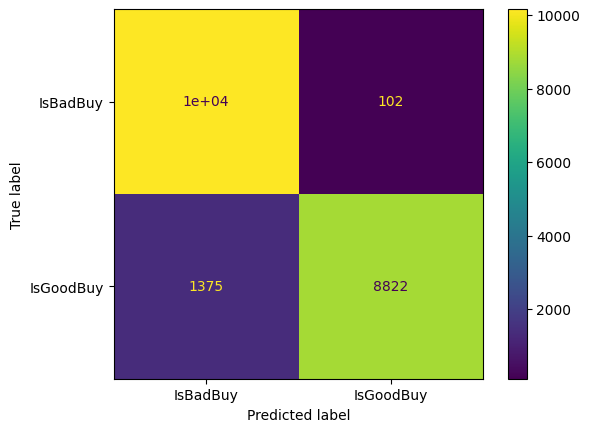

Model: XGBoost
For Test Dataset, 
Precision_Score: 0.5201612903225806
Recall_Score:  0.07384087006296508
F1_Score:  0.1293233082706767
Accuracy_Score:  0.8810029458107831

 Confusion Matirx:  [[12731   119]
 [ 1618   129]]


<Figure size 400x200 with 0 Axes>

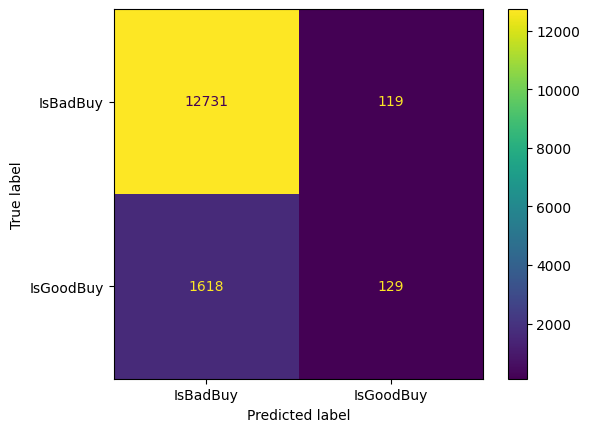

Processing model:  LightGBM
For validation dataset
Precision_Score: 0.9973382710334452
Recall_Score:  0.8493987778434852
F1_Score:  0.9174429126523661
Accuracy_Score:  0.9242046620730098

 Confusion Matirx:  [[10294    23]
 [ 1528  8618]]


<Figure size 400x200 with 0 Axes>

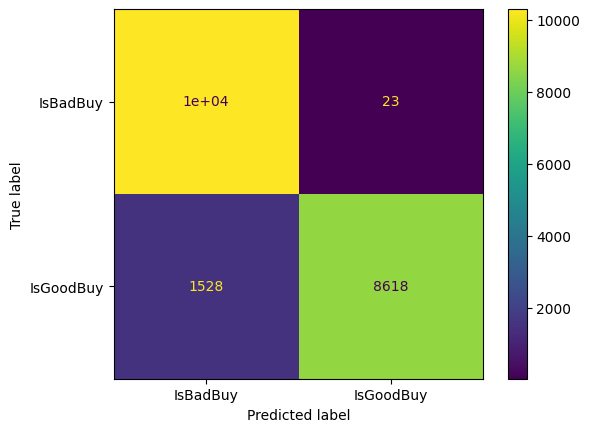

For validation dataset
Precision_Score: 0.9978411544142711
Recall_Score:  0.853449951409135
F1_Score:  0.9200146665968256
Accuracy_Score:  0.92537751062894

 Confusion Matirx:  [[10154    19]
 [ 1508  8782]]


<Figure size 400x200 with 0 Axes>

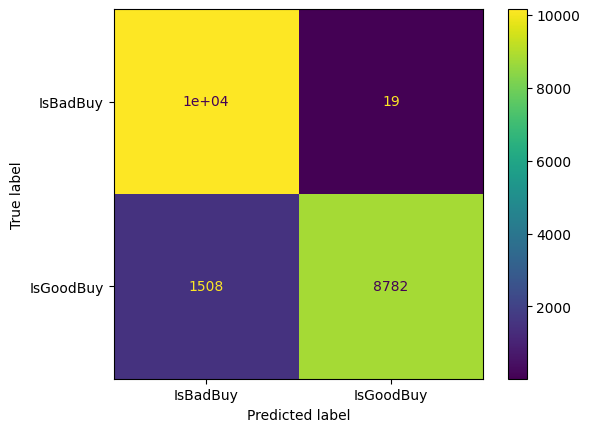

For validation dataset
Precision_Score: 0.9973702263892065
Recall_Score:  0.8516891232181215
F1_Score:  0.9187908152517379
Accuracy_Score:  0.9246444802814836

 Confusion Matirx:  [[10198    23]
 [ 1519  8723]]


<Figure size 400x200 with 0 Axes>

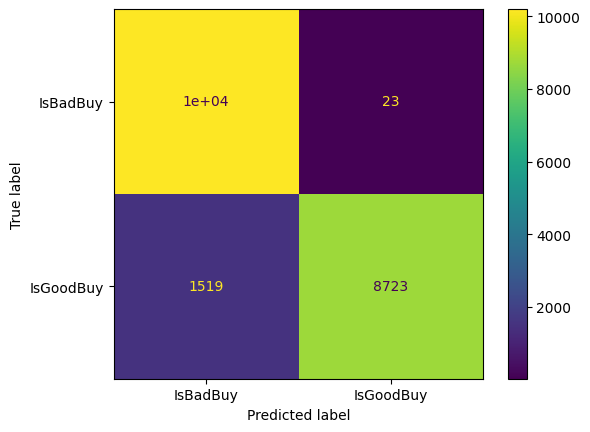

For validation dataset
Precision_Score: 0.9967375407807403
Recall_Score:  0.8617000583544058
F1_Score:  0.9243127640707319
Accuracy_Score:  0.9290915310560524

 Confusion Matirx:  [[10152    29]
 [ 1422  8860]]


<Figure size 400x200 with 0 Axes>

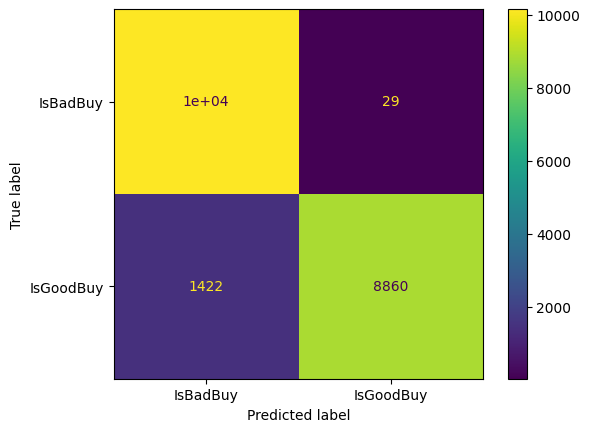

For validation dataset
Precision_Score: 0.9981653480105492
Recall_Score:  0.8536824556242032
F1_Score:  0.9202875568241887
Accuracy_Score:  0.9263024142312579

 Confusion Matirx:  [[10249    16]
 [ 1492  8705]]


<Figure size 400x200 with 0 Axes>

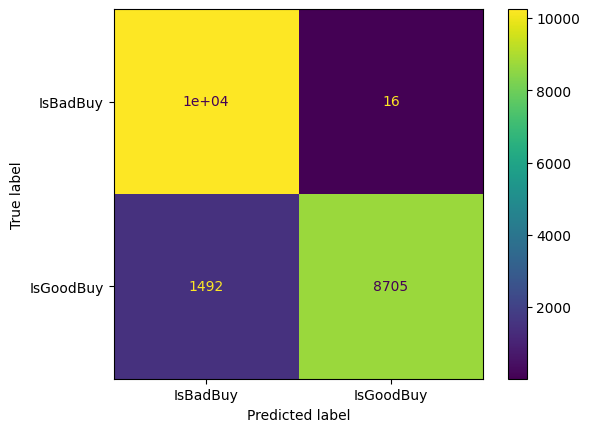

Model: LightGBM
For Test Dataset, 
Precision_Score: 0.639344262295082
Recall_Score:  0.022323983972524327
F1_Score:  0.04314159292035399
Accuracy_Score:  0.8814824964033705

 Confusion Matirx:  [[12828    22]
 [ 1708    39]]


<Figure size 400x200 with 0 Axes>

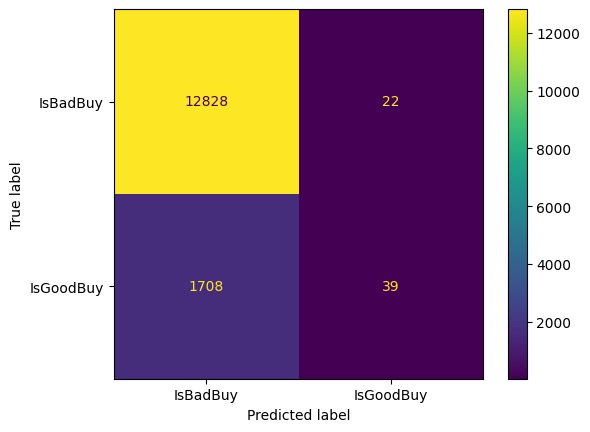

In [37]:
#  Perform k-fold cross validation on the data, and evalute the model using 1. Accuracy, 2. Precision, 3. Recall, 4. F1 score for each fold, using models like Logistic Regression, Random Forest, XGBoost, and LightGBM
# Setting the number of folds for k-fold cross validation to 5, generally having a higher number of folds is better, but it also increases the training time
n_splits = 5

# Define the models to use for cross validation
models = [('Logistic Regression', LogisticRegression()),
          ('Decision Trees', DecisionTreeClassifier()),
          ('XGBoost', xgb.XGBClassifier(eval_metric=f1_score)),
          ('LightGBM', lgb.LGBMClassifier(metric='f1', is_unbalance=False))]

#here n_splits = 5, so at each iteration, we'll have: (102314/5) test obsvs, remaining: training
# Perform k-fold cross validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state = 42)
for model_name, model in models:
    print("Processing model: ", model_name)
    i = 0
    for train_index, test_index in kf.split(x_balanced[relevant_columns]):
        print("Processing fold:", i+1, "/", n_splits, end="\r")   
        X_train, X_val = x_balanced[relevant_columns].iloc[train_index], x_balanced[relevant_columns].iloc[test_index]
        y_train, y_val = y_balanced.iloc[train_index], y_balanced.iloc[test_index]   
        
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        print('For validation dataset')
        performance(y_val, y_val_pred)
    print('Model: {}'.format(model_name))
    y_test_pred = model.predict(xtest) 
    print("For Test Dataset, ")
    performance(ytest, y_test_pred)

On Test Dataset, Performance value of LogisticRegression: </br>
Precision_Score: 0.18016949152542372
Recall_Score:  0.6084716657126502
F1_Score:  0.278017523211717
Accuracy_Score:  0.6217715969034733

On Test Dataset, Performance value of DecisionTree: </br>
Precision_Score: 0.1723128398159766
Recall_Score:  0.2358328563251288
F1_Score:  0.19913001449975834
Accuracy_Score:  0.7729670480235665


On Test Dataset, Performance value of XGBoost: </br>
or Test Dataset, 
Precision_Score: 0.5201612903225806
Recall_Score:  0.07384087006296508
F1_Score:  0.1293233082706767
Accuracy_Score:  0.8810029458107831

On Test Dataset, Performance value of LightGBM: </br>
Precision_Score: 0.639344262295082
Recall_Score:  0.022323983972524327
F1_Score:  0.04314159292035399
Accuracy_Score:  0.8814824964033705

<b>Logistic Regression model has the highest recall, meaning that it is able to find the correct positives better than others. Recall is a measure used when false negatives are costly.</b>

## Performing HyperParameter Tuning

In [38]:
models = [('Logistic Regression', LogisticRegression()), #we'll fit the data ion xtrain (balanced,smote)
          ('Decision Trees', DecisionTreeClassifier()),
          ('XGBoost', xgb.XGBClassifier(eval_metric=f1_score)),
          ('LightGBM', lgb.LGBMClassifier(metric='f1', is_unbalance=False))]


Performing hyperparameter tuning for Logistic Regression...
Model: Logistic Regression
Best hyperparameters: {'C': 100}
Best score: 0.6544772900196091
For Test Dataset, Performance: 
Precision_Score: 0.18452803406671398
Recall_Score:  0.5953062392673154
F1_Score:  0.28172829473113914
Accuracy_Score:  0.6367061725011989

 Confusion Matirx:  [[8254 4596]
 [ 707 1040]]


<Figure size 400x200 with 0 Axes>

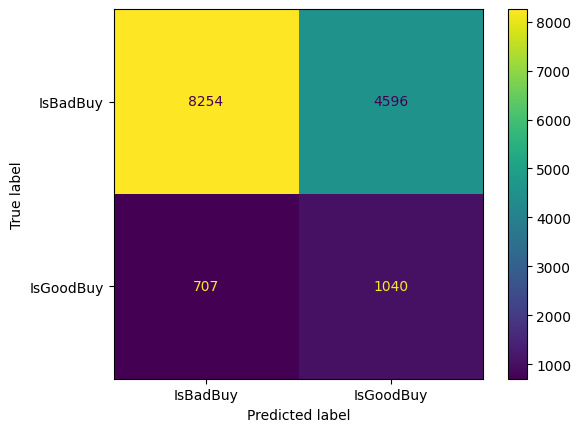



Performing hyperparameter tuning for Decision Trees...
Model: Decision Trees
Best hyperparameters: {'max_depth': None}
Best score: 0.850440970149828
For Test Dataset, Performance: 
Precision_Score: 0.1870689655172414
Recall_Score:  0.2484258729250143
F1_Score:  0.21342512908777972
Accuracy_Score:  0.7808453791875043

 Confusion Matirx:  [[10964  1886]
 [ 1313   434]]


<Figure size 400x200 with 0 Axes>

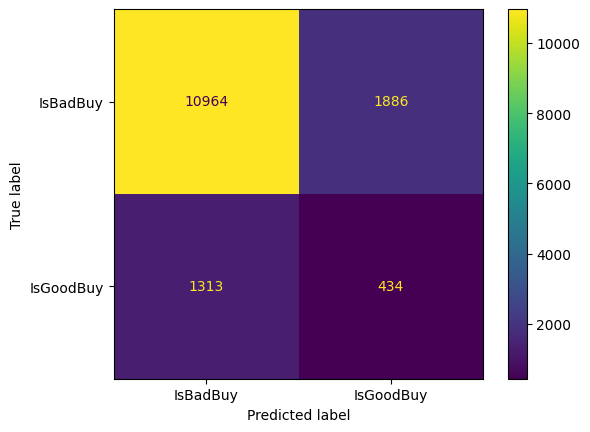



Performing hyperparameter tuning for XGBoost...
Model: XGBoost
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}
Best score: 0.9221983875713247
For Test Dataset, Performance: 
Precision_Score: 0.5225225225225225
Recall_Score:  0.03319977103606182
F1_Score:  0.06243272335844994
Accuracy_Score:  0.8806604096732206

 Confusion Matirx:  [[12797    53]
 [ 1689    58]]


<Figure size 400x200 with 0 Axes>

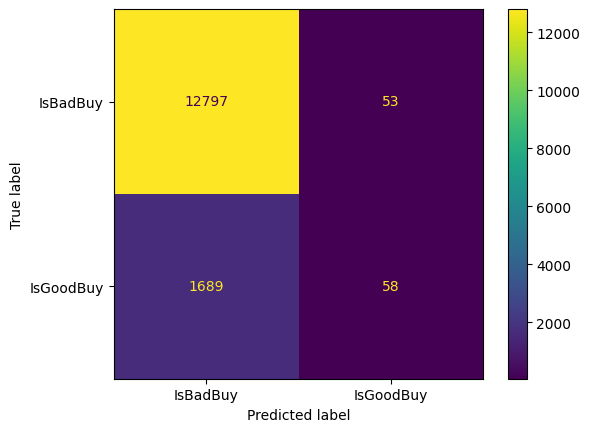



Performing hyperparameter tuning for LightGBM...
Model: LightGBM
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}
Best score: 0.9216730557386001
For Test Dataset, Performance: 
Precision_Score: 0.6
Recall_Score:  0.03606182026330853
F1_Score:  0.06803455723542118
Accuracy_Score:  0.8817565253134205

 Confusion Matirx:  [[12808    42]
 [ 1684    63]]


<Figure size 400x200 with 0 Axes>

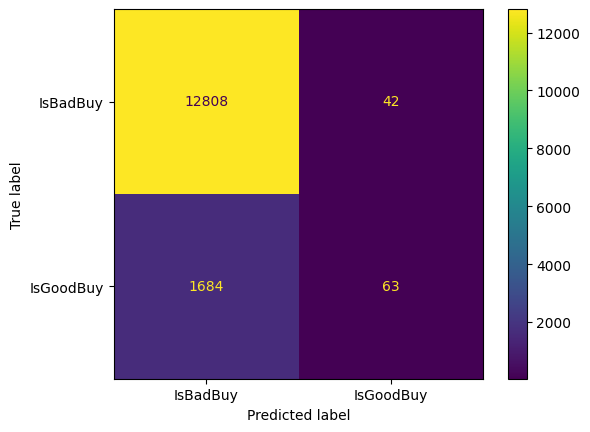

In [39]:
# Set the number of folds for k-fold cross validation\
from sklearn.model_selection import GridSearchCV
n_splits = 2
# Define the models to use for cross validation
models = [('Logistic Regression', LogisticRegression(), {'C': [0.01, 0.1, 1, 10, 100]}),
          ('Decision Trees', DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
          ('XGBoost', xgb.XGBClassifier(eval_metric=f1_score), {'learning_rate': [0.01, 0.1,], 'max_depth': [None, 3, 5], 'n_estimators': [100, 200]}),
          ('LightGBM', lgb.LGBMClassifier(metric='f1', is_unbalance=False), {'learning_rate': [0.01, 0.1], 'max_depth': [None, 3, 5], 'n_estimators': [100, 200]})]

# Perform hyperparameter tuning using grid search cross-validation
for model_name, model, param_grid in models:
    print('Performing hyperparameter tuning for {}...'.format(model_name))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    grid_search = GridSearchCV(model, param_grid=param_grid, cv=kf, scoring='f1')
    grid_search.fit(x_balanced, y_balanced) #x_balanced, y_balanced-> is_balanced

    # Print the best hyperparameters and the corresponding score
    print('Model: {}'.format(model_name))
    print('Best hyperparameters: {}'.format(grid_search.best_params_))
    print('Best score: {}'.format(grid_search.best_score_))
    xtest_pred = grid_search.predict(xtest) #xtest is imbalanced
    print("For Test Dataset, Performance: ")
    performance(ytest, xtest_pred)
    print('\n')

<b>After performing Hyperparameter Tuning(With Standardization)</b></br>
Performance for LogisticReg:</br>
Best score: 0.6545370218841199
For Test Dataset, Performance: 
Precision_Score: 0.1841594637502205
Recall_Score:  0.5975958786491128
F1_Score:  0.2815533980582524
Accuracy_Score:  0.6349934918133863

Performance for DecisionTree: </br> 
Best score: 0.8509498540441038
For Test Dataset, Performance: 
Precision_Score: 0.18227635447291055
Recall_Score:  0.2484258729250143
F1_Score:  0.21027131782945738
Accuracy_Score:  0.7766664383092416

Performance for XGBoost: </br>
Best score: 0.9221983875713247
For Test Dataset, Performance: 
Precision_Score: 0.5225225225225225
Recall_Score:  0.03319977103606182
F1_Score:  0.06243272335844994
Accuracy_Score:  0.8806604096732206

Performance for LightGBM: </br>
Best score: 0.9216730557386001
For Test Dataset, Performance: 
Precision_Score: 0.6
Recall_Score:  0.03606182026330853
F1_Score:  0.06803455723542118
Accuracy_Score:  0.8817565253134205



<b>In the end, LogisticRegression has the highest recall, and the best parameters don't make much difference, we'll consider the default parameters. </b>

## Creating A submission File

In [40]:
#performing smote on entire df, to increase balanced raining set
smote = SMOTE(random_state=42)
# Apply SMOTE to your training data
x_df_balanced , y_df_balanced = smote.fit_resample(x, y)

In [41]:
test_df_id = df_test['refid']
df_test.drop('refid', axis = 1, inplace = True)

In [42]:
lgr_model = LogisticRegression()
#training model on partially balanced dataset, xtrain 
lgr_model.fit(x_df_balanced, y_df_balanced) 
final_test = lgr_model.predict(df_test)

In [ ]:
submission = pd.DataFrame({'RefId': test_df_id, 'IsBadBuy': final_test})
submission.to_csv("SubmitMe.csv",index = False)
#public accuracy: 0.0945